In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
import os
import cv2
path='D:/Joshwin/lab9/archive/Training'
classes={'no_tumor':0,'pituitary_tumor':1}
x=[]
y=[]
for key in classes:
    pth=os.path.join(path,key)
    for i in os.listdir(pth):
      img=cv2.imread(os.path.join(pth,i),0)
      img=cv2.resize(img,(200,200))
      x.append(img)
      y.append(classes[key])


In [3]:
x=np.array(x)
y=np.array(y)

In [4]:
pd.Series(y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [5]:
x_updated=x.reshape(len(x),-1)

In [6]:
x.shape, x_updated.shape

((1222, 200, 200), (1222, 40000))

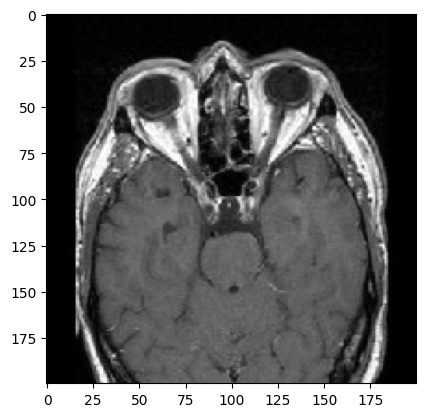

In [7]:
plt.imshow(x[0], cmap='gray')


In [8]:
X_updated = x.reshape(len(x),-1)
X_updated.shape

(1222, 40000)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, random_state=10,
                                               test_size=.20)

In [10]:
X_train.shape,X_test.shape

((977, 40000), (245, 40000))

In [11]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [12]:
from sklearn.svm import SVC


In [13]:
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [14]:
print("Training Score:", sv.score(X_train, y_train))
print("Testing Score:", sv.score(X_test, y_test))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [15]:
pred = sv.predict(X_test)

In [16]:
misclassified=np.where(y_test!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [17]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[239],y_test[239])

Total Misclassified Samples:  9
1 0


In [18]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

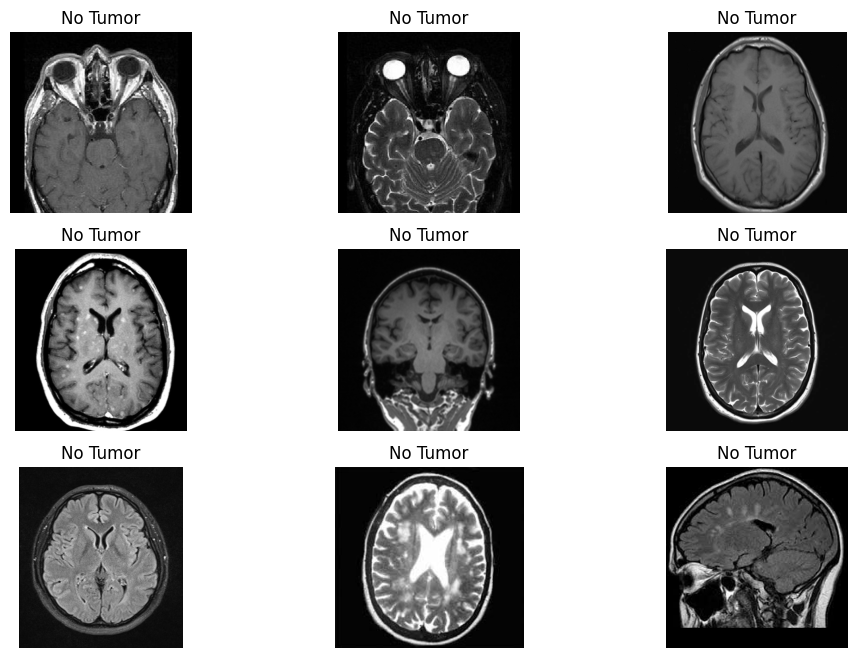

In [19]:
plt.figure(figsize=(12,8))
c=1
path='D:/Joshwin/lab9/archive/Training/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

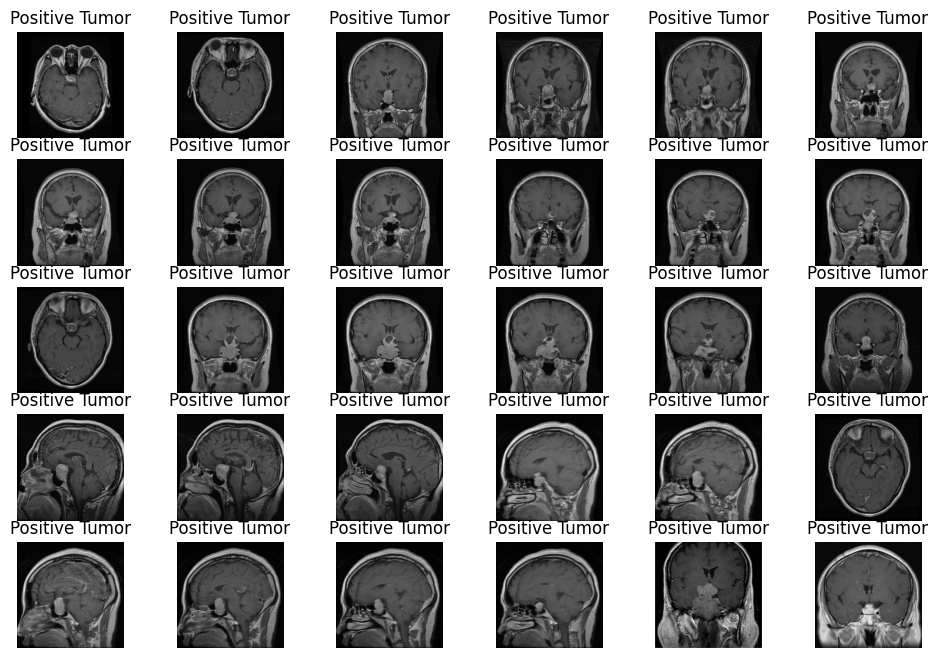

In [20]:
plt.figure(figsize=(12,8))
c=1
path='D:/Joshwin/lab9/archive/Training/pituitary_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()


In [29]:
import os
import cv2
import random
path='D:/Joshwin/lab9/archive/Training'

X = []
Y = []
Ages = {'no_tumor': [], 'pituitary_tumor': []}
min_age = 18
max_age = 90
classes = {'pituitary_tumor': 0, 'no_tumor': 1}
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
        age = random.randint(min_age, max_age)
        Ages[cls].append(age)

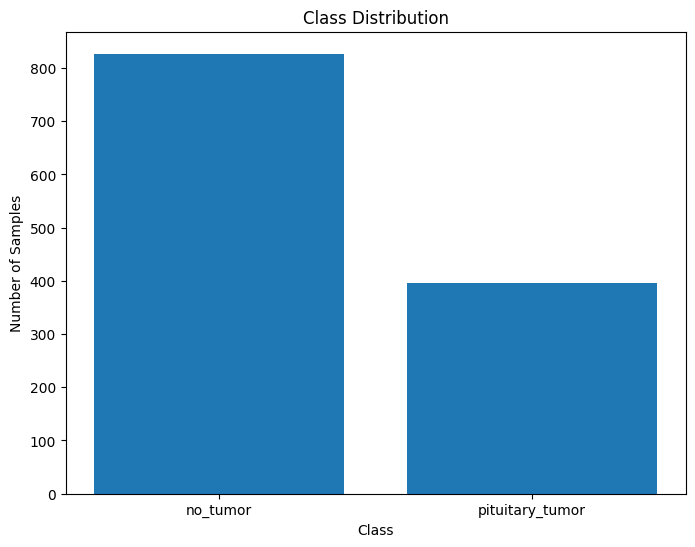

In [30]:

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(8, 6))
plt.hist(Y, bins=[0, 1, 2], rwidth=0.8, align='left')
plt.xticks([0, 1], ['no_tumor', 'pituitary_tumor'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


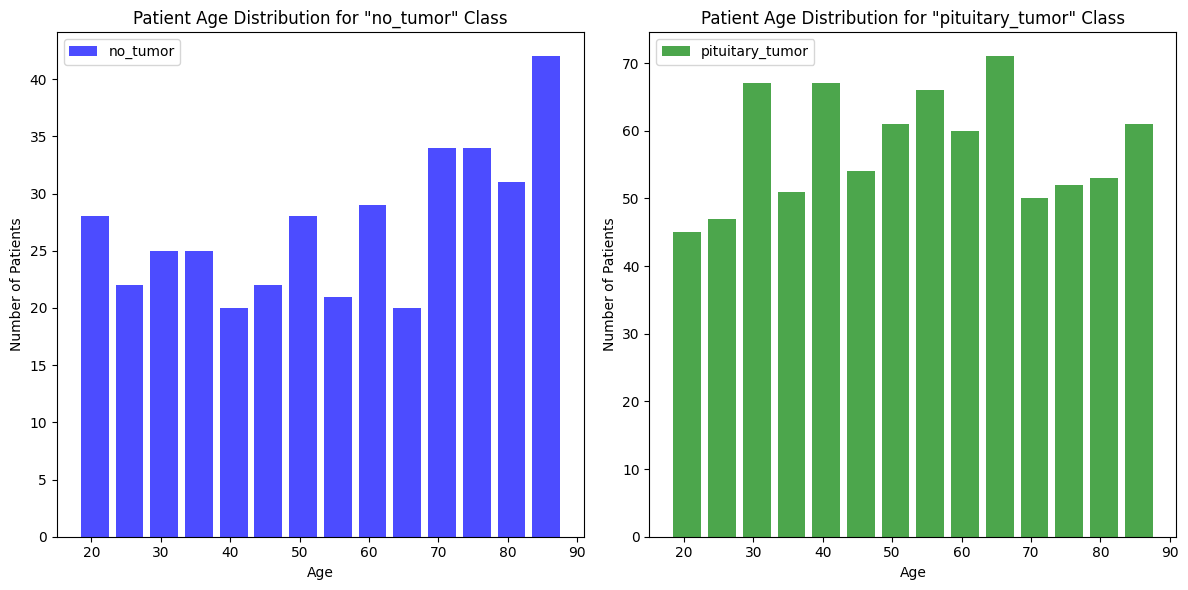

In [31]:
Ages['no_tumor'] = np.array(Ages['no_tumor'])
Ages['pituitary_tumor'] = np.array(Ages['pituitary_tumor'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(Ages['no_tumor'], bins=np.arange(min_age, max_age+1, 5), rwidth=0.8, color='blue', alpha=0.7, label='no_tumor')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Patient Age Distribution for "no_tumor" Class')
ax1.legend()

# patient age distribution for
ax2.hist(Ages['pituitary_tumor'], bins=np.arange(min_age, max_age+1, 5), rwidth=0.8, color='green', alpha=0.7, label='pituitary_tumor')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Patients')
ax2.set_title('Patient Age Distribution for "pituitary_tumor" Class')
ax2.legend()

plt.tight_layout()
plt.show()

In [32]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

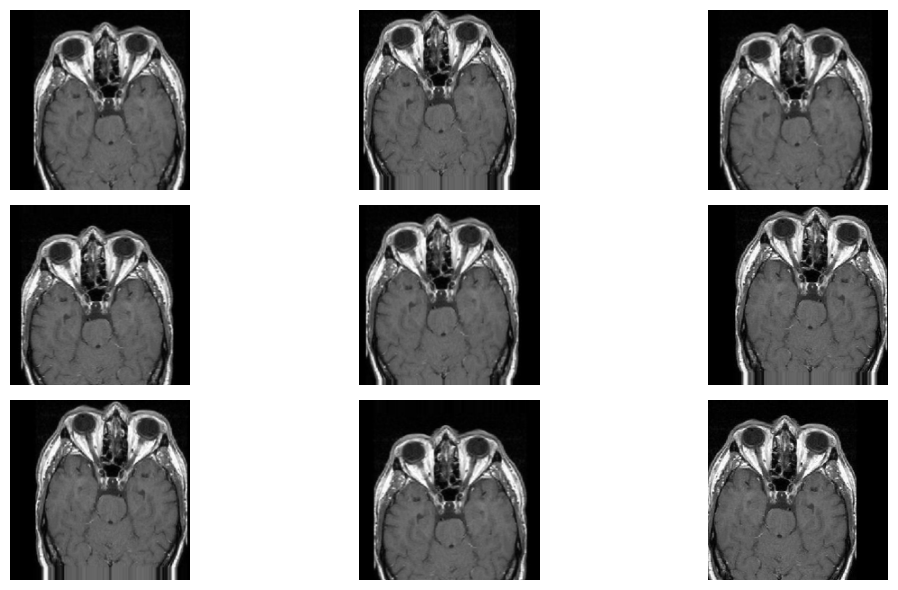

In [33]:
from keras.preprocessing.image import ImageDataGenerator
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape + (1,))

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

plt.figure(figsize=(12, 6))
for i in range(9):
    augmented_image = datagen.random_transform(X[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[:, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.90        83
           1       0.93      0.98      0.95       162

    accuracy                           0.94       245
   macro avg       0.94      0.92      0.93       245
weighted avg       0.94      0.94      0.94       245



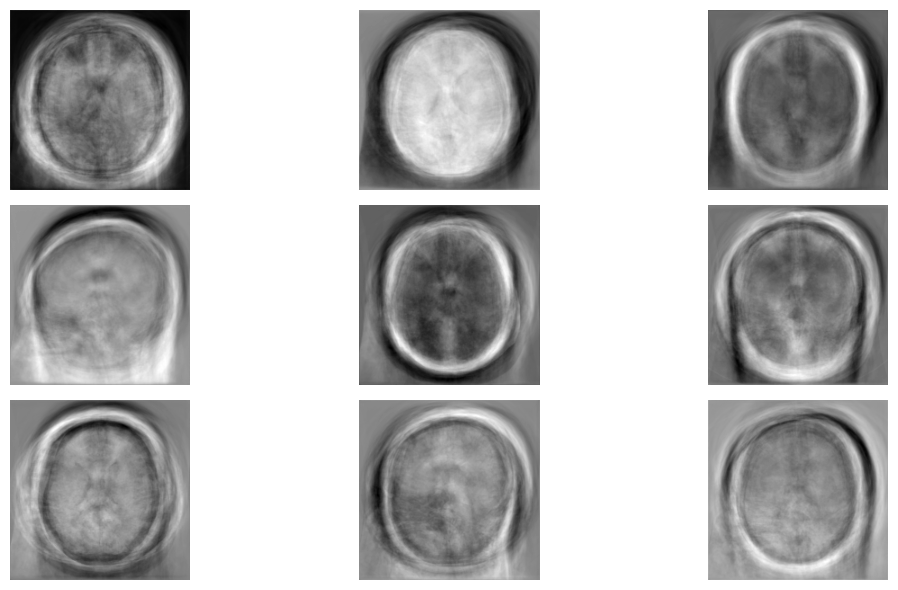

In [34]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_flat = X.reshape(X.shape[0], -1)

n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_flat)
X_pca = pca.transform(X_flat)

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)


classifier = svm.SVC(kernel='linear', C=0.1)
classifier.fit(X_train, Y_train)


Y_pred = classifier.predict(X_test)

print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))


plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(pca.components_[i].reshape(200, 200), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


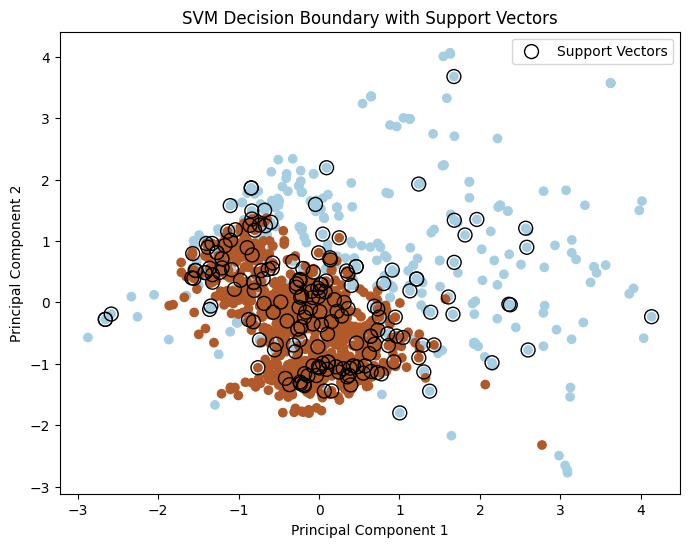

In [35]:


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.Paired)
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
     

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9387755102040817
Precision: 0.9298245614035088
Recall: 0.9814814814814815
F1 Score: 0.954954954954955
ROC AUC Score: 0.9184515841142347


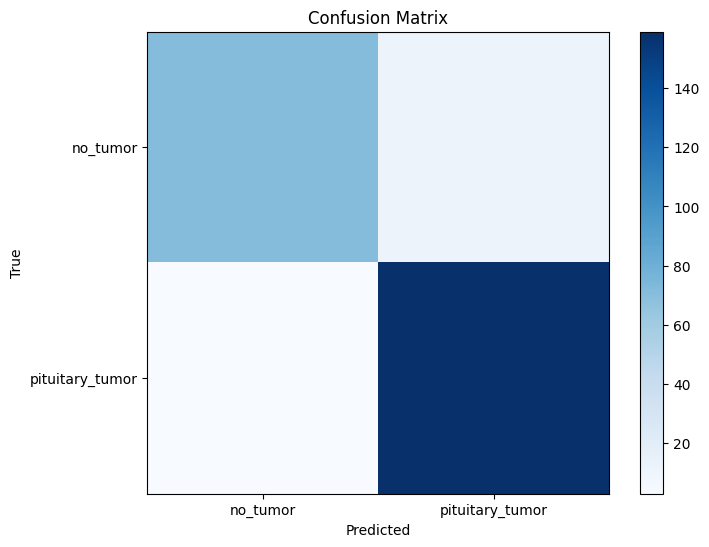

In [37]:
confusion = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], classes.keys())
plt.yticks([0, 1], classes.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

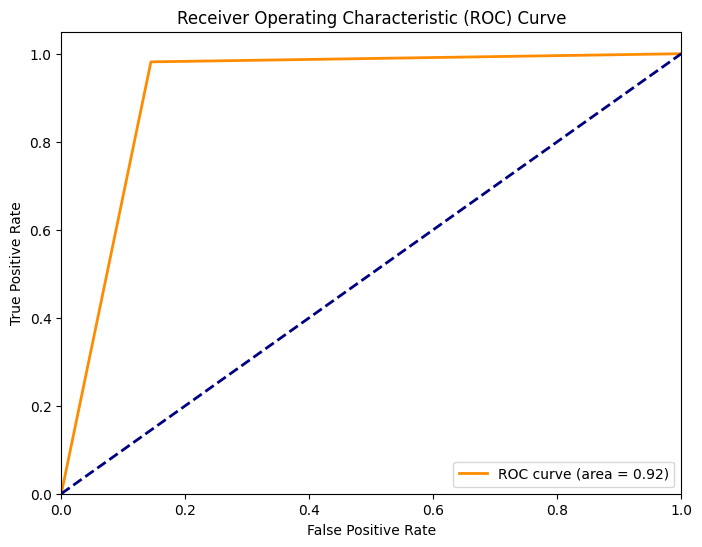

In [38]:

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_

# Training the SVM model
best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, Y_train)


Y_pred = best_svm.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9551020408163265
Precision: 0.9520958083832335
Recall: 0.9814814814814815
F1 Score: 0.9665653495440729


In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_

# Training the SVM model
best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, Y_train)


Y_pred = best_svm.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

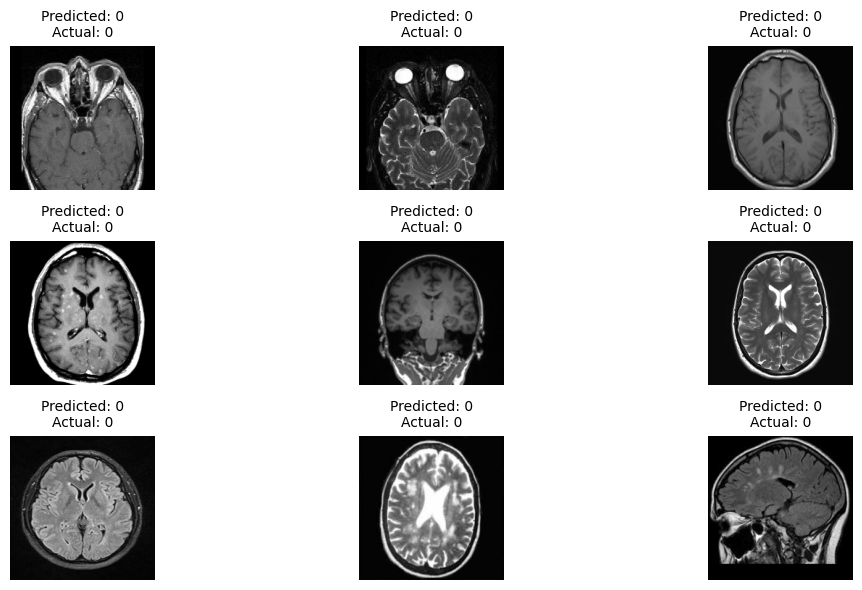

In [41]:

test_path= 'D:/Joshwin/lab9/archive/Training'
X_test = []
Y_test = []
tclasses = {'no_tumor':0 , 'pituitary_tumor': 1}
for cls in tclasses:
    tpth = os.path.join(test_path, cls)
    for j in os.listdir(tpth):
        img = cv2.imread(os.path.join(tpth, j), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (200, 200))
        X_test.append(img)
        Y_test.append(tclasses[cls])

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_test_pca = pca.transform(X_test_flat)
Y_pred_test = best_svm.predict(X_test_pca)

plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {Y_pred_test[i]}\nActual: {Y_test[i]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()